In [2]:
import classiq
import matplotlib.pyplot as plt
classiq.authenticate()

The current version of 'classiq' has been deprecated, and will not be supported as of 2024-07-27. Please run "pip install -U classiq" to upgrade the classiq SDK to the latest version.
C:\Users\panch\Documents\QUANTUM_COMPUTING\WOMANIUM\womanium-env\lib\site-packages\classiq\_internals\authentication\token_manager.py:96: UserWarning: Device is already registered.
Generating a new refresh token should only be done if the current refresh token is compromised.
To do so, set the overwrite parameter to true
  warnings.warn(


# Assignment   


Code the algorithm of the Hadamard test that we covered in class using the Python SDK (below is a print screen of the Qmod for your convenience). Execute it from the SDK using 1,000 , 2,000 , 4,000 , 8,000 and 16,000 shots, and for each job calculate the (real part of the) expectation value using the formula  Re { <0 | Usub qft | 0 > } = 2P(0)-1
.
Plot a graph of the expectation value as a function of the number of shots. Add the theoretical value to the graph. Explain the results. 

In [3]:
from classiq import *

@qfunc
def main(expectation_value: Output[QBit], psi: Output[QArray[QBit]]):
    """
    6.8 Assignment: Quantum Primitives 1 (Session: June 26) Classiq Certificate 2    
    Hadamard Test Exercise 01 
    Francini Corrales Garro
    Part 1
    Creating the Hadamard test
    """
    allocate(1, expectation_value);    
    allocate(4, psi);
    H(expectation_value);
    control(ctrl=expectation_value, operand = lambda: qft(psi) );
    H(expectation_value);



In [4]:
"""
    6.8 Assignment: Quantum Primitives 1 (Session: June 26) Classiq Certificate 2    
    Hadamard Test Exercise 01 
    Francini Corrales Garro
    Part 2 
    Running n number of shots 1000 2000 4000 8000 16000
"""
from classiq.execution import ExecutionPreferences

shots_test = [1000,2000,4000,8000, 16000]
jobs = []

for num_shots in shots_test:
    quantum_model = create_model(main)
    quantum_model_with_execution_preferences = set_execution_preferences(
        quantum_model, ExecutionPreferences(num_shots=num_shots, job_name="classiq shot with: "+ str(num_shots)),
    )
    quantum_program_with_execution_preferences = synthesize(quantum_model_with_execution_preferences)
    job = execute(quantum_program_with_execution_preferences)
    print( f"The job on the provider {job.provider} on the backend {job.backend_name} with {job.num_shots} shots is {job.status} can be accessed in the IDE with this URL: {job.ide_url}")
    jobs.append(job)




The job on the provider Classiq on the backend simulator with 1000 shots is QUEUED can be accessed in the IDE with this URL: https://platform.classiq.io/jobs/c5d618b4-f9e5-4c99-8354-ac34c76b28e6
The job on the provider Classiq on the backend simulator with 2000 shots is QUEUED can be accessed in the IDE with this URL: https://platform.classiq.io/jobs/50722a28-69b9-4ce6-9602-af1abd7eed45
The job on the provider Classiq on the backend simulator with 4000 shots is QUEUED can be accessed in the IDE with this URL: https://platform.classiq.io/jobs/d59b74db-87a4-4c7f-a62b-880f2d4818ec
The job on the provider Classiq on the backend simulator with 8000 shots is QUEUED can be accessed in the IDE with this URL: https://platform.classiq.io/jobs/dcd29fff-9550-41cd-ac5e-74d7e0525901
The job on the provider Classiq on the backend simulator with 16000 shots is QUEUED can be accessed in the IDE with this URL: https://platform.classiq.io/jobs/50743f10-4a62-4ced-9b3d-64db1e67040f


In [4]:
"""
    6.8 Assignment: Quantum Primitives 1 (Session: June 26) Classiq Certificate 2    
    Hadamard Test Exercise 01 
    Francini Corrales Garro
    Part 3 
    Getting the real expected value for each set of runs 
    Return a set of data with the required infomation to the expectation value
"""

suma_0 = 0
suma_1 = 0
_cont = 0
_data = [] 
for job in jobs:
    results = job.result()[0].value
    resultados = results.parsed_counts
    
    for resultado in resultados:
        expectation_value = resultado.state['expectation_value']
        shots = resultado.shots    
        if expectation_value== 0.0:
            suma_0 += shots
        elif expectation_value == 1.0:
            suma_1 += shots
    
    final_result = [
        {'expectation_value': 0.0, 'count': suma_0},
        {'expectation_value': 1.0, 'count': suma_1}]

    total = final_result[0]['count'] + final_result[1]['count']
    p0 =  int(final_result[0]['count']) / total
    p1 = int(final_result[1]['count']) /total
    real_part = 2*p0 - 1
    print('Number of shots: ' + str(shots_test[_cont]) +'     P(0): ' + str(p0) + '    P(1): ' + str(p1) + '     Real part of the expectation value: '+ str(real_part))
    _data.append({ 'number_shots':shots_test[_cont], 'P0':p0, 'P1':p1, 'real_part':real_part})
    #hipotesis =0.5
    _cont +=1

Number of shots: 1000     P(0): 0.645    P(1): 0.355     Real part of the expectation value: 0.29000000000000004
Number of shots: 2000     P(0): 0.627    P(1): 0.373     Real part of the expectation value: 0.254
Number of shots: 4000     P(0): 0.6244285714285714    P(1): 0.37557142857142856     Real part of the expectation value: 0.2488571428571429
Number of shots: 8000     P(0): 0.6264666666666666    P(1): 0.37353333333333333     Real part of the expectation value: 0.25293333333333323
Number of shots: 16000     P(0): 0.6214838709677419    P(1): 0.37851612903225806     Real part of the expectation value: 0.24296774193548387


In [8]:
#_data

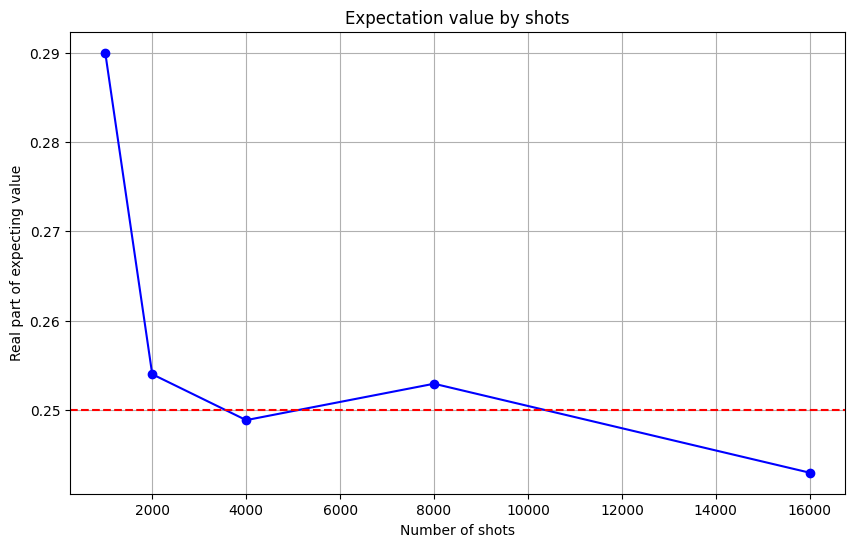

In [6]:
# Getting values for axis
number_shots = [item['number_shots'] for item in _data]
real_part = [item['real_part'] for item in _data]
theoretical_value = 0.25
# Building graph
plt.figure(figsize=(10, 6))
plt.plot(number_shots, real_part, marker='o', linestyle='-', color='b')
plt.axhline(y=theoretical_value, color='r', linestyle='--', label='Teorethical value')

# Etiquetas y título del gráfico
plt.xlabel('Number of shots')
plt.ylabel('Real part of expecting value')
plt.title('Expectation value by shots')
plt.grid(True)
plt.show()

## Explanation
The hadamard test is use to estimate the real part of the expectation value of a nunitary operator.
As the number of shots increases, the estimation of the real part of the expectation value gets closer to the theoretical value. If we make more measurements the uncertainty should be less.


In [7]:
#print(results.counts)
#print(results.parsed_states)
#print(results.counts_lsb_right)
#write_qmod(quantum_model_with_execution_preferences, "execute")
#show(quantum_program_with_execution_preferences)